In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [139]:
p = 0.9
p_interactive_task = 0.2
first_task_length = 5

agent1 = pd.DataFrame({"priority":[random.random() for i in range(first_task_length)],\
                       "tasks":[random.random()<=p_interactive_task for i in range(first_task_length)],\
                        "interval":[0 for i in range(first_task_length)]})
agent2 = pd.DataFrame({"priority":[random.random() for i in range(first_task_length)],\
                       "tasks":[random.random()<=p_interactive_task for i in range(first_task_length)],\
                        "interval":[0 for i in range(first_task_length)]})

def updatetask(agent):
    l = max(agent.index.values)+1
    agent["interval"] += 1
    newline = {"priority":random.random(),\
                "tasks":(random.random()<=p_interactive_task),\
                "interval":0}
    return pd.concat([agent, pd.DataFrame(newline,index=[l]) ])

int_tasks = []
int_interactive = []
j = 0
for i in tqdm.tqdm(range(50000)):
    if random.random()<=p:
        task1 = agent1[agent1['priority']==agent1['priority'].max()]
        # task2 = agent2[agent2['priority']==agent2['priority'].max()] # both
    else:
        task1 = agent1.sample()
        # task2 = agent2.sample()
    if random.random()<=p:
        task2 = agent2[agent2['priority']==agent2['priority'].max()]
    else:
        task2 = agent2.sample()

    if task1["tasks"].values and task2["tasks"].values:
        int_interactive.append(j)
        j=0
    
    agent1 = agent1.drop(task1.index)
    agent2 = agent2.drop(task2.index)
    agent1 = updatetask(agent1)
    agent2 = updatetask(agent2)
    int_tasks.append(task1["interval"].values[0])
    int_tasks.append(task2["interval"].values[0])
    j+=1

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:48<00:00, 1028.17it/s]


In [140]:
len(int_tasks), len(int_interactive)

(100000, 1998)

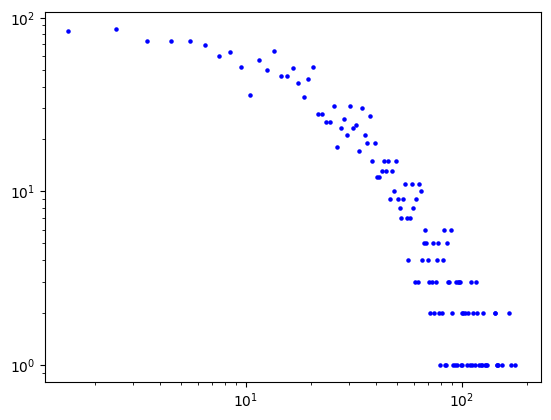

In [141]:
res = int_interactive
bins = [i for i in range(int(min(res)),int(max(res)))]
bins_plot = np.add(bins,0.5)
hist,bins = np.histogram(res, bins=bins)
plt.scatter(bins_plot[:-1], hist,color="blue",s=5)

plt.xscale("log")
plt.yscale("log")
plt.show()

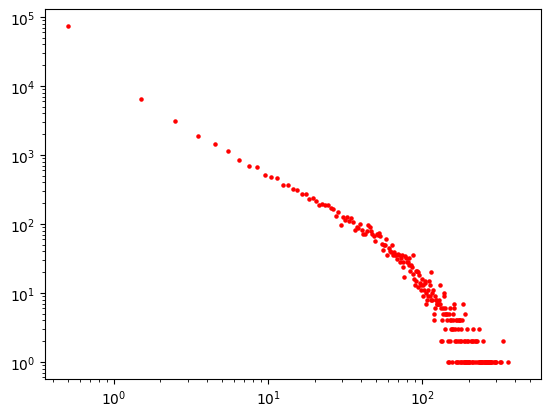

In [138]:
res = int_tasks
bins = [i for i in range(int(min(res)),int(max(res)))]
bins_plot = np.add(bins,0.5)
hist,bins = np.histogram(res, bins=bins)
plt.scatter(bins_plot[:-1], hist,color="red",s=5)

plt.xscale("log")
plt.yscale("log")
plt.show()